<a target="_blank" href="https://colab.research.google.com/github/0kihs/PWS/blob/main/Notebooks/pca.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Hier is te vinden hoe je zelf PCA-analyse kan doen op de tokens van onze modellen!

---

Klik op de "open in colab" knop om het zelf online uit te proberen :)

Eerst installeren we de benodigde bestanden, en downloaden we het model. Je kan dit uitvoeren met de run cell knop linksboven.


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import AutoModelForCausalLM, AutoTokenizer
from huggingface_hub import notebook_login

notebook_login()

!pip install -U bitsandbytes

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig


bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_use_double_quant=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained("lenarc/Llamalasa", quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llamalasa")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

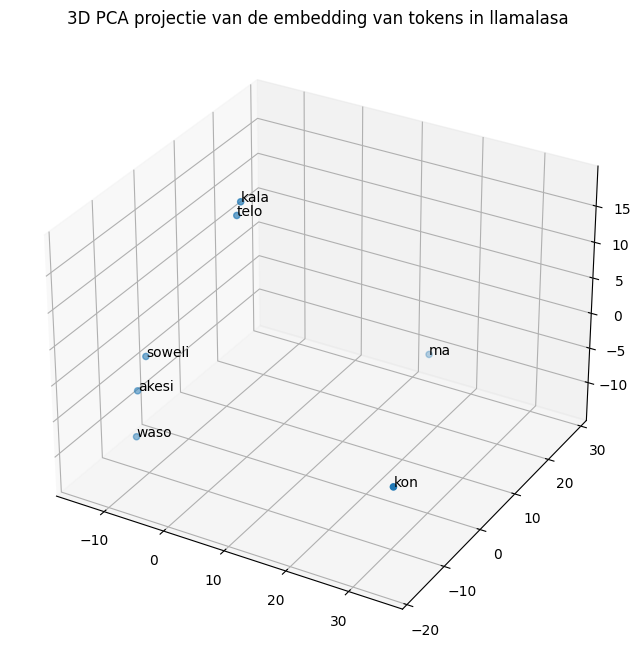

In [ ]:
# Vul woorden in om te analyseren
from sklearn.decomposition import PCA

woorden = ["soweli", "kala", "waso", "akesi", "telo", "ma", "kon"]

embeddings = []

# Extraheer embeddings
for woord in woorden:
    inputs = tokenizer(woord, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)

    last_hidden_state = outputs.hidden_states[-1]

    # Neem het gemiddelde over de lengte van de woorden
    woord_embedding = last_hidden_state.mean(dim=1).squeeze().numpy()
    embeddings.append(woord_embedding)

# Voer PCA uit
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot een grafiek!
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2]
ax.scatter(x, y, z)

for i, word in enumerate(dutch_words):
    ax.text(x[i], y[i], z[i], word)

plt.title(f"3D PCA projectie van de embedding van tokens in llamalasa")
plt.show()